# 1. Business Understanding

Dataset source: https://www.kaggle.com/datasets/grassknoted/asl-alphabet 

# 2. Data Understanding

## 2.1 Reading data and recoloring

/home/zech/anaconda3/envs/mlenv/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


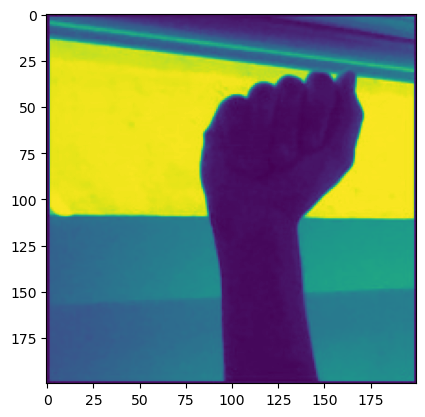

In [1]:
from skimage.io import imread
import matplotlib.pyplot as plt

x = imread("datasets/asl_alphabet_test/asl_alphabet_test/A_test.jpg", as_gray=True)
plt.imshow(x)
plt.show()